# Construcción de un Modelo de Regresión con Random Forest

## Introducción
En este notebook, se construye un modelo de regresión utilizando el algoritmo Random Forest. Se seguirán los siguientes pasos:

- Importar Bibliotecas
- Cargar los Datos
- Dividir los Datos
- Crear y Entrenar el Modelo de Random Forest
- Realizar Predicciones
- Calcular las Métricas de Evaluación
- Validar el Modelo Seleccionado

## Paso 1: Importar Bibliotecas
En este paso, se importan las bibliotecas necesarias para cargar los datos, construir el modelo y evaluar su rendimiento.

In [36]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

## Paso 2: Cargar los Datos
En este paso, se carga el conjunto de datos desde un archivo CSV en un DataFrame de pandas.

In [37]:
# Cargar los datos en un DataFrame de pandas
df = pd.read_csv('AUTO_MODIF.csv')  


In [38]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,number-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [39]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.00000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329561,3.255317,10.142537,103.902439,5129.02439,25.219512,30.751220,13207.126829
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270847,0.313598,3.972040,39.680343,478.40526,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.00000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.00000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.00000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.00000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.00000,49.000000,54.000000,45400.000000


## Paso 3: Dividir los Datos
En este paso, se dividen los datos en conjuntos de entrenamiento (X_train, y_train) y prueba (X_test, y_test) utilizando la función train_test_split. Las variables independientes se seleccionan en X y la variable dependiente en y.

In [40]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X = df[['horsepower', 'curb-weight', 'engine-size', 'city-mpg']]  # Variables independientes
y = df['price']  # Variable dependiente (precio)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

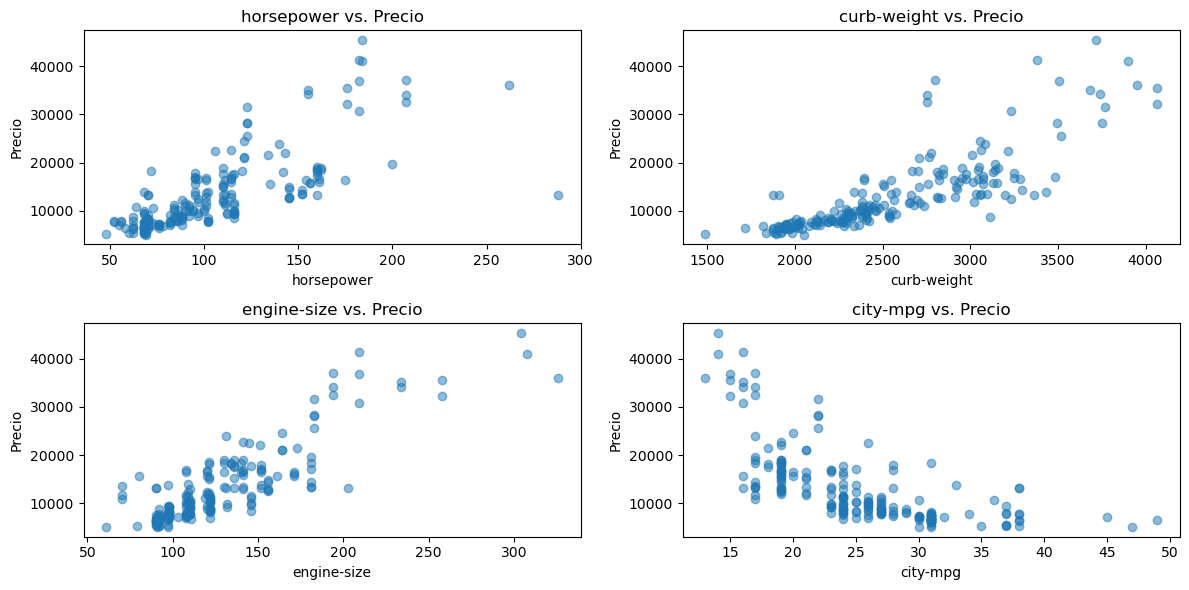

In [41]:
# Crear un gráfico de dispersión de las variables independientes vs. el precio
plt.figure(figsize=(12, 6))
for i, col in enumerate(X.columns):
    plt.subplot(2, 2, i + 1)
    plt.scatter(X[col], y, alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('Precio')
    plt.title(f'{col} vs. Precio')
plt.tight_layout()
plt.show()

## Paso 4: Crear y Entrenar el Modelo de Random Forest
En este paso, se crea un modelo de Random Forest utilizando RandomForestRegressor de scikit-learn. Se ha establecido un número de estimadores (n_estimators). Puedes ajustar los hiperparámetros según sea necesario.

In [42]:
# Crear y entrenar el modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Puedes ajustar los hiperparámetros según sea necesario
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Paso 5: Realizar Predicciones
En este paso, se utilizan el modelo entrenado para realizar predicciones en el conjunto de prueba (X_test) y se almacenan en y_pred.

In [43]:
# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

## Paso 6: Calcular las Métricas de Evaluación
En este paso, se calculan dos métricas de evaluación: el Error Cuadrado Medio (MSE) y el coeficiente de determinación (R^2). Estas métricas proporcionan información sobre la calidad del modelo en la predicción de los precios de los automóviles. El MSE mide la calidad de las predicciones y R^2 proporciona una medida de la varianza explicada por el modelo.

In [44]:
# Calcular las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R^2): {r2}')


Mean Squared Error (MSE): 5928704.68522117
R-squared (R^2): 0.9239637476576582


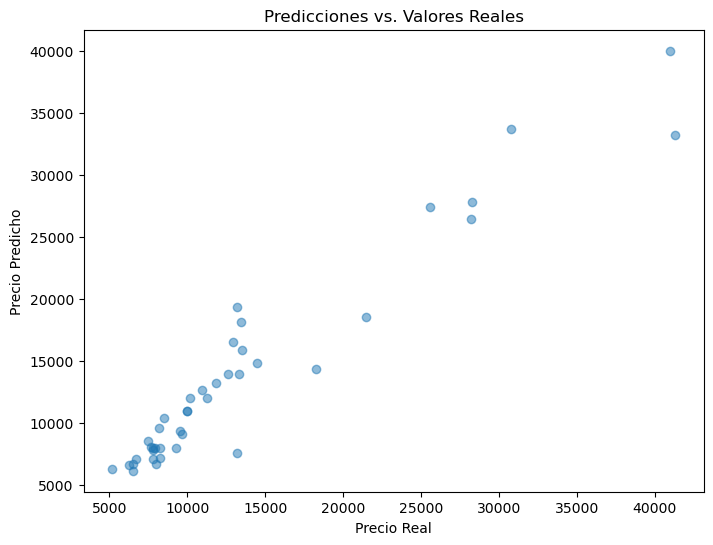

In [45]:
# Visualización de las predicciones vs. los valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Predicciones vs. Valores Reales')
plt.show()

## Reporte de Desempeño del Modelo
A continuación, se presenta un reporte detallado del desempeño del modelo de regresión con Random Forest:

### Métricas de Evaluación
El modelo se evaluó utilizando las siguientes métricas:

- Error Cuadrado Medio (MSE): 5928704.68522117
- Coeficiente de Determinación (R^2): 0.9239637476576582

El MSE mide la calidad de las predicciones, y un valor más bajo indica un mejor rendimiento del modelo. En este caso, el MSE es de aproximadamente 5,928,705. El coeficiente de determinación (R^2) proporciona una medida de la varianza explicada por el modelo. Un valor cercano a 1 indica que el modelo explica bien la variabilidad en los datos, y en este caso, R^2 es de aproximadamente 0.924, lo que sugiere un buen ajuste del modelo a los datos.

### Validez del Modelo Seleccionado
La validez del modelo seleccionado (Random Forest) depende de varios factores, como la calidad de los datos, la elección de características relevantes, la configuración de hiperparámetros y la interpretación de las métricas de evaluación. Para determinar si el modelo es adecuado, se deben realizar las siguientes acciones:

- Realizar un análisis exploratorio de datos (EDA) para comprender la relación entre las características y la variable objetivo (precio).
- Ajustar los hiperparámetros del modelo para mejorar su rendimiento utilizando técnicas como la validación cruzada.
- Interpretar las métricas de evaluación (MSE, R^2) y compararlas con otros modelos o técnicas para seleccionar el modelo más apropiado.
- Evaluar la robustez del modelo mediante pruebas en datos nuevos o utilizando técnicas como la validación cruzada.

En resumen, la elección de un modelo de Random Forest es un buen punto de partida, pero se debe realizar un análisis exhaustivo y ajustes adicionales para garantizar la validez del modelo en la predicción de los precios de los automóviles.